# Quality Analysis (General)

#### Updated: May 19, 2023

#  

Quality analysis pipeline after phase 2 of Alouette processing (OCR processing phase):

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
rootDir = 'L:/DATA/Alouette_I/BATCH_II_Run2/'
resultDir = rootDir + '05_result/'
logDir = rootDir + '06_log/'

#  

#### Combine BATCH I and II:

#  

#### Stage 1 - Overall Statistics:

In [3]:
df_inventory = pd.read_csv(logDir + 'image_inventory.csv')
n_images = df_inventory['images'].sum()

In [4]:
df_s1 = pd.read_csv(resultDir + 'result_stage1_raw.csv', low_memory=False)

In [5]:
n_proc = len(df_s1.loc[df_s1['processed_image_class'] == 'num']) + len(df_s1.loc[df_s1['processed_image_class'] == 'dot'])
n_loss = len(df_s1.loc[df_s1['processed_image_class'] == 'loss'])
n_outlier = len(df_s1.loc[df_s1['processed_image_class'] == 'outlier'])
n_unproc = n_images - n_proc - n_outlier - n_loss

In [6]:
print('# of images: ' + str(n_images))
print('# of images processed after stage 1 processing: ' + str(n_proc))
print('% of images processed after stage 1 processing: ' + str(round(((n_proc/n_images)*100), 2)) + ' %')
print('')
print("% total loss after stage 1 processing: " + str(round((((n_unproc + n_loss + n_outlier)/n_images)*100), 2)) + ' %')
print('% of images unprocessed after stage 1 processing: ' + str(round(((n_unproc/n_images)*100), 2)) + ' %')
print("% of images classified as 'loss' after stage 1 processing: " + str(round(((n_loss/n_images)*100), 2)) + ' %')
print("% of images classified as 'outlier' after stage 1 processing: " + str(round(((n_outlier/n_images)*100), 2)) + ' %')

# of images: 726577
# of images processed after stage 1 processing: 449732
% of images processed after stage 1 processing: 61.9 %

% total loss after stage 1 processing: 38.1 %
% of images unprocessed after stage 1 processing: 17.34 %
% of images classified as 'loss' after stage 1 processing: 13.07 %
% of images classified as 'outlier' after stage 1 processing: 7.7 %


Breakdown 'loss' type:

In [7]:
df_loss_bd = df_s1.loc[df_s1['processed_image_class'] == 'loss'].groupby(['func_name']).count()[['filename']]
df_loss_bd.sort_values('filename', ascending=False)

,filename
func_name,
metadata_translation.determine_leftside_metadata_grid_mapping.extract_centroids_and_determine_type,37872
ionogram_content_extraction.extract_select_parameters.extract_fmin_and_max_depth,9521
image_segmentation.trim_raw_metadata.trimming_metadata,3968
image_segmentation.extract_ionogram_from_scan.extract_ionogram,1


Breakdown 'outlier' type:

In [8]:
df_outlier_bd = df_s1.loc[df_s1['processed_image_class'] == 'outlier'].groupby(['func_name']).count()[['filename']]
df_outlier_bd.sort_values('filename', ascending=False)

,filename
func_name,
image_segmentation.segment_images_in_subdir.segment_images: iono size outlier,54428
image_segmentation.segment_images_in_subdir.segment_images: metadata size outlier,1511


#  

#### Stage 2 - Overall Statistics:

In [9]:
df_s2 = pd.read_csv(resultDir + 'result_stage2_raw.csv', low_memory=False)

In [10]:
n_num2 = len(df_s2.loc[df_s2['processed_image_class'] == 'num2'])
n_num = len(df_s2.loc[df_s2['processed_image_class'] == 'num'])
n_dot = len(df_s2.loc[df_s2['processed_image_class'] == 'dot'])
n_proc2 = n_num2 + n_num + n_dot
n_loss = len(df_s2.loc[df_s2['processed_image_class'] == 'loss'])
n_outlier = len(df_s2.loc[df_s2['processed_image_class'] == 'outlier'])

In [11]:
print('# of images processed after stage 2 processing: ' + str(n_proc2))
print('% of images processed after stage 2 processing: ' + str(round(((n_proc2/n_images)*100), 2)) + ' %')
print('')
print("% of images classified as 'num2' after stage 2 processing: " + str(round(((n_num2/n_images)*100), 2)) + ' %')
print("% of images classified as 'num' after stage 2 processing: " + str(round(((n_num/n_images)*100), 2)) + ' %')
print("% of images classified as 'dot' after stage 2 processing: " + str(round(((n_dot/n_images)*100), 2)) + ' %')
print('')
print("% total loss after stage 2 processing: " + str(round((((n_unproc + n_loss + n_outlier)/n_images)*100), 2)) + ' %')
print("% of images classified as 'loss' after stage 2 processing: " + str(round(((n_loss/n_images)*100), 2)) + ' %')
print("% of images classified as 'outlier' after stage 2 processing: " + str(round(((n_outlier/n_images)*100), 2)) + ' %')

# of images processed after stage 2 processing: 162618
% of images processed after stage 2 processing: 22.38 %

% of images classified as 'num2' after stage 2 processing: 8.74 %
% of images classified as 'num' after stage 2 processing: 13.07 %
% of images classified as 'dot' after stage 2 processing: 0.58 %

% total loss after stage 2 processing: 43.86 %
% of images classified as 'loss' after stage 2 processing: 21.9 %
% of images classified as 'outlier' after stage 2 processing: 4.62 %


Breakdown 'loss' type:

In [12]:
df_s2_loss = df_s2.copy(deep=True).loc[df_s2['processed_image_class'] == 'loss']
df_s2_loss['loss_summary'] = df_s2_loss['func_name'] + ', ' + df_s2_loss['details'] 
df_loss_bd = df_s2_loss.groupby(['loss_summary']).count()[['filename']]
df_loss_bd.sort_values('filename', ascending=False)

,filename
loss_summary,
"image_segmentation.segment_images_in_subdir.segment_images: iono size outlier, OCR read metadata contains letters",613
"ionogram_content_extraction.extract_select_parameters.extract_fmin_and_max_depth, OCR read metadata contains letters",152
"metadata_translation.determine_leftside_metadata_grid_mapping.extract_centroids_and_determine_type, OCR read metadata contains letters",30
"image_segmentation.trim_raw_metadata.trimming_metadata, OCR read metadata contains letters",13
"image_segmentation.segment_images_in_subdir.segment_images: metadata size outlier, OCR read metadata contains letters",5


In [13]:
df_s2_loss = df_s2.loc[df_s2['processed_image_class'] == 'loss']
df_loss_bd = df_s2_loss.groupby(['details']).count()[['filename']]
df_loss_bd.sort_values('filename', ascending=False)

,filename
details,
metadata could not be read by OCR,89326
OCR read metadata contains letters,9693
metadata was interpreted to be dot type,1774
metadata was interpreted to be num type,1213


Breakdown 'outlier' type:

In [14]:
df_s2_outlier = df_s2.loc[df_s2['processed_image_class'] == 'outlier']
df_outlier_bd = df_s2_outlier.groupby(['func_name']).count()[['filename']]
df_outlier_bd.sort_values('filename', ascending=False)

,filename
func_name,
image_segmentation.segment_images_in_subdir.segment_images: iono size outlier,32354
image_segmentation.segment_images_in_subdir.segment_images: metadata size outlier,1226


#  

#### Master - Overall Statistics:

In [15]:
df_master = pd.read_csv(resultDir + 'result_master.csv', low_memory=False)
n_master = len(df_master.loc[(~pd.isna(df_master['Station_Code'])) & (df_master['time_quality'] == 1)])

In [16]:
n_tq1 = len(df_master.loc[df_master['time_quality'] == 1])
n_tq2 = len(df_master.loc[df_master['time_quality'] == 2])
n_tq3 = len(df_master.loc[df_master['time_quality'] == 3])
n_tq4 = len(df_master.loc[df_master['time_quality'] == 4])

In [17]:
print('# of images fully read after stage 2 processing: ' + str(n_master))
print('% of images fully read after stage 2 processing (yield): ' + str(round(((n_master/n_images)*100), 2)) + ' %')
print('')
print('% time quality level 1 yield: ' + str(round(((n_tq1/n_images)*100), 2)) + ' %')
print('% at least time quality level 2: ' + str(round((((n_tq1+n_tq2)/n_images)*100), 2)) + ' %')
print('% at least time quality level 3: ' + str(round((((n_tq1+n_tq2+n_tq3)/n_images)*100), 2)) + ' %')
print('% at least time quality level 4: ' + str(round((((n_tq1+n_tq2+n_tq3+n_tq4)/n_images)*100), 2)) + ' %')

# of images fully read after stage 2 processing: 123336
% of images fully read after stage 2 processing (yield): 16.97 %

% time quality level 1 yield: 16.97 %
% at least time quality level 2: 17.02 %
% at least time quality level 3: 17.14 %
% at least time quality level 4: 17.83 %


#  

#### Data distribution by ground station:

In [18]:
df2 = df_master.copy(deep=True)
df2['Station_Number_Station_Code_processed_image_class'] = df2['Station_Number'].astype(int).astype(str) + '_' + df2['Station_Code'] + '_' + df2['processed_image_class']

In [19]:
df_master_by_stn = df2.groupby(['Station_Number']).count()[['filename']].sort_values('filename', ascending=False)
df_master_by_stn.head(10)

,filename
Station_Number,
5.0,22688
13.0,12137
50.0,11970
43.0,11946
1.0,10702
3.0,8676
8.0,5768
9.0,5419
12.0,5384


In [20]:
df_master_by_stnname = df2.groupby(['Station_Name']).count()[['filename']].sort_values('filename', ascending=False)
df_master_by_stnname.head(50)

,filename
Station_Name,
"Quito, Ecuador",24081
"Resolute Bay, NT, Canada",12923
"Ottawa, Canada",12242
"College, Fairbanks, AK, USA",11858
"Blossom Point, MD, USA",9829
"Fort Myers, FL, USA",8413
Falkland Islands (Islas Malvinas),7195
"Winkfield, England, UK",6869
"Santiago, Chile",5346


In [21]:
df_master_by_stn_code = df2.groupby(['Station_Number_Station_Code_processed_image_class']).count()[['filename']].sort_values('filename', ascending=False)
df_master_by_stn_code.head(20)

,filename
Station_Number_Station_Code_processed_image_class,
5_QUI_num,19984
43_RES_num2,11887
50_OTT_num2,11807
13_COL_num,11300
1_BPT_num,9724
3_FTM_num,5278
9_SOL_num,4807
53_KNO_num2,4259
69_TRO_num2,4130


- show geographic distribution by metatype type 
- show geographic distribution by year

- show how each ground station used the same metadata type over time (metadata composition by ground station over time)


- Matplotlib - basemap
- cartopy
- ipyleaflet (interactive)
- plotly 

#  

#### Construct process_summary:

Load data:

In [22]:
print(len(df_inventory))
df_inventory.head()

2416


,Directory,Subdirectory,images,subdir_id
0,R014207709,145,53,R014207709_145
1,R014207709,146,63,R014207709_146
2,R014207709,147,50,R014207709_147
3,R014207709,148,16,R014207709_148
4,R014207709,149,28,R014207709_149


In [23]:
df_process_log = pd.read_csv(logDir + 'process_log.csv')
print(len(df_process_log))
df_p1 = df_process_log.sort_values('Process_timestamp', ascending=True)
df_p1 = df_p1.drop_duplicates(subset=['subdir_id'], keep='last') 
print(len(df_p1))
df_p1.head()

2487
2417


,Directory,Subdirectory,Images_processed,Images_dot,Images_num,Images_loss,Images_outlier,Process_time,Process_timestamp,User,subdir_id
0,R014207837,4013-50,162.0,0.0,150.0,4.0,8.0,277.122729,2023-05-13 11:13:35.969795,Rav Super3,R014207837_4013-50
1,R014207769,JUNE-28-TO-JULY-6-1965,0.0,0.0,0.0,0.0,0.0,214.129275,2023-05-13 11:13:50.695690,Rav Super5,R014207769_JUNE-28-TO-JULY-6-1965
2,R014207820,2993-43A,16.0,0.0,12.0,0.0,4.0,232.333798,2023-05-13 11:15:58.948288,Rav Super8,R014207820_2993-43A
3,R014207813,5037,339.0,0.0,0.0,278.0,61.0,267.199561,2023-05-13 11:17:12.488731,Rav Super9,R014207813_5037
4,R014207822,3436-50-A,267.0,0.0,257.0,0.0,10.0,541.358854,2023-05-13 11:23:17.637033,Rav Super5,R014207822_3436-50-A


In [24]:
df_process_log2 = pd.read_csv(logDir + 'process_log_OCR.csv')
print(len(df_process_log2))
df_p2 = df_process_log2.sort_values('Process_timestamp', ascending=True)
df_p2 = df_p2.drop_duplicates(subset=['subdir_id'], keep='last') 
print(len(df_p2))
df_p2.head()

1188
1187


,Directory,Subdirectory,Process_time,Process_timestamp,User,subdir_id
0,R014207827,3822-43A,990.216040,2023-05-15 18:06:19.824654,Rav Super1,R014207827_3822-43A
1,R014207820,3000-43A,1062.283440,2023-05-15 18:24:02.150093,Rav Super1,R014207820_3000-43A
2,R014207835,4060-19,940.294587,2023-05-15 18:39:42.472678,Rav Super1,R014207835_4060-19
3,R014207963,1544-1B,814.297740,2023-05-15 18:53:16.795418,Rav Super1,R014207963_1544-1B
4,R014207711,39,384.984926,2023-05-15 18:59:41.800343,Rav Super1,R014207711_39


In [25]:
df_pp = pd.read_csv(resultDir + 'result_postprocess_raw.csv', low_memory=False)

Construct process_summary:

In [26]:
df_sum1 = df_inventory.merge(df_p1[['Images_processed', 'Images_loss', 'Images_outlier', 'Process_time', 'subdir_id']], how='left', on='subdir_id')
df_sum1 = df_sum1.rename(columns={
    'images': 'n_images',
    'Images_loss': 'n_stage1_loss',
    'Images_outlier': 'n_stage1_outlier',
    'Process_time': 'process_time_stage1'
})
df_sum1['n_stage1_processed'] = df_sum1['Images_processed'] - df_sum1['n_stage1_loss'] - df_sum1['n_stage1_outlier']
df_sum1['n_stage1_unprocessed'] = df_sum1['n_images'] - df_sum1['Images_processed']
df_sum1 = df_sum1[['Directory', 'Subdirectory', 'n_images', 'n_stage1_processed', 'n_stage1_unprocessed', 'n_stage1_loss',
                  'n_stage1_outlier', 'process_time_stage1', 'subdir_id']]
print(len(df_sum1))
df_sum1.sample(10)

2416


,Directory,Subdirectory,n_images,n_stage1_processed,n_stage1_unprocessed,n_stage1_loss,n_stage1_outlier,process_time_stage1,subdir_id
870,R014207825,3731-19A,341,302.0,0.0,31.0,8.0,1439.383825,R014207825_3731-19A
263,R014207769,JULY-30-TO-AUG-8-1965,233,0.0,233.0,0.0,0.0,147.650146,R014207769_JULY-30-TO-AUG-8-1965
2239,R014207963,1508-1B,354,333.0,3.0,0.0,18.0,854.468370,R014207963_1508-1B
654,R014207818,4231-43A,304,289.0,0.0,0.0,15.0,2114.297522,R014207818_4231-43A
431,R014207810,5121,459,3.0,1.0,244.0,211.0,312.299067,R014207810_5121
781,R014207820,2978-5B,308,9.0,271.0,8.0,20.0,198.146080,R014207820_2978-5B
462,R014207811,5059,329,5.0,0.0,293.0,31.0,465.266086,R014207811_5059
1024,R014207827,3825-43A,293,285.0,1.0,0.0,7.0,990.103231,R014207827_3825-43A
344,R014207807,4972,404,10.0,0.0,252.0,142.0,459.883635,R014207807_4972
1948,R014207944,1994-12A,291,251.0,9.0,3.0,28.0,473.045608,R014207944_1994-12A


In [27]:
df_sum2 = df_sum1.merge(df_p2[['Process_time', 'subdir_id']], how='left', on='subdir_id')
df_sum2 = df_sum2.rename(columns={
    'Process_time': 'process_time_stage2'
})
df_sum2 = df_sum2[['Directory', 'Subdirectory', 'n_images', 'n_stage1_processed', 'n_stage1_unprocessed', 'n_stage1_loss',
                  'n_stage1_outlier', 'process_time_stage1', 'process_time_stage2', 'subdir_id']]
print(len(df_sum2))
df_sum2.sample(10)

2416


,Directory,Subdirectory,n_images,n_stage1_processed,n_stage1_unprocessed,n_stage1_loss,n_stage1_outlier,process_time_stage1,process_time_stage2,subdir_id
1657,R014207839,4100-43A,307,292.0,0.0,0.0,15.0,688.406359,238.933748,R014207839_4100-43A
981,R014207826,3902-12-2,345,215.0,2.0,4.0,124.0,570.867767,NaN,R014207826_3902-12-2
2132,R014207952,2720-9A,281,258.0,5.0,5.0,13.0,614.680441,NaN,R014207952_2720-9A
1853,R014207892,127,228,0.0,228.0,0.0,0.0,201.560580,NaN,R014207892_127
2078,R014207950,2486-5-B,340,318.0,1.0,2.0,19.0,848.227156,221.181359,R014207950_2486-5-B
2157,R014207952,2745-4A,326,0.0,326.0,0.0,0.0,1043.258902,NaN,R014207952_2745-4A
2269,R014207963,1538-5A,333,306.0,3.0,5.0,19.0,1168.475707,1307.191425,R014207963_1538-5A
934,R014207826,3855-19A,296,289.0,1.0,0.0,6.0,607.999760,161.904381,R014207826_3855-19A
201,R014207766,MAR-7-TO-MAR-16-1965,403,0.0,403.0,0.0,0.0,191.360282,NaN,R014207766_MAR-7-TO-MAR-16-1965
1050,R014207828,4392-50,278,267.0,0.0,0.0,11.0,1100.962324,3767.114774,R014207828_4392-50


In [28]:
df_s2['subdir_id'] = df_s2['Directory'] + '_' + df_s2['Subdirectory']
df_sum3_ = pd.DataFrame()

for i in range(0, len(df_sum2)):
    subdir_id = df_sum2['subdir_id'].iloc[i]
    df_s2_ = df_s2[['processed_image_class', 'filename', 'subdir_id']].loc[df_s2['subdir_id'] == subdir_id]
    if len(df_s2_) > 0:
        n_s2_proc = len(df_s2_.loc[df_s2_['processed_image_class'] == 'num2']) + len(df_s2_.loc[df_s2_['processed_image_class'] == 'num']) + len(df_s2_.loc[df_s2_['processed_image_class'] == 'dot'])
        n_s2_loss = len(df_s2_.loc[df_s2_['processed_image_class'] == 'loss'])
        n_s2_outlier = len(df_s2_.loc[df_s2_['processed_image_class'] == 'outlier'])
        row = pd.DataFrame({
            'n_stage2_processed': n_s2_proc,
            'n_stage2_loss': n_s2_loss,
            'n_stage2_outlier': n_s2_outlier,
            'subdir_id': subdir_id
        }, index=[0])
        df_sum3_ = pd.concat([df_sum3_, row])

df_sum3 = df_sum2.merge(df_sum3_, how='left', on='subdir_id')
df_sum3 = df_sum3[['Directory', 'Subdirectory', 'n_images', 'n_stage1_processed', 'n_stage1_unprocessed', 'n_stage1_loss',
                  'n_stage1_outlier', 'process_time_stage1', 'process_time_stage2', 'n_stage2_processed', 'n_stage2_loss',
                  'n_stage2_outlier', 'subdir_id']]

In [29]:
print(len(df_sum3))
df_sum3.sample(10)

2416


,Directory,Subdirectory,n_images,n_stage1_processed,n_stage1_unprocessed,n_stage1_loss,n_stage1_outlier,process_time_stage1,process_time_stage2,n_stage2_processed,n_stage2_loss,n_stage2_outlier,subdir_id
1142,R014207829,4303-19,285,269.0,0.0,6.0,10.0,1678.674440,NaN,NaN,NaN,NaN,R014207829_4303-19
242,R014207769,APR-28-TO-MAY-4-1965,389,0.0,389.0,0.0,0.0,203.350507,NaN,NaN,NaN,NaN,R014207769_APR-28-TO-MAY-4-1965
2358,R028224481,4869-50,286,268.0,0.0,0.0,18.0,439.387585,217.616022,0.0,268.0,18.0,R028224481_4869-50
452,R014207811,5049,337,33.0,6.0,269.0,29.0,501.876309,NaN,NaN,NaN,NaN,R014207811_5049
2396,R028224481,4907,257,2.0,0.0,245.0,10.0,1158.850767,1442.779699,2.0,245.0,10.0,R028224481_4907
405,R014207808,4613-50,313,220.0,2.0,2.0,89.0,1155.042673,3697.584879,166.0,60.0,85.0,R014207808_4613-50
2059,R014207945,2287-3A,345,209.0,78.0,1.0,57.0,872.216014,NaN,NaN,NaN,NaN,R014207945_2287-3A
1502,R014207836,4725-50,181,156.0,0.0,6.0,19.0,592.868830,NaN,NaN,NaN,NaN,R014207836_4725-50
784,R014207820,2982-18B,339,93.0,0.0,211.0,35.0,942.306561,NaN,NaN,NaN,NaN,R014207820_2982-18B
1108,R014207829,4269-46A-2,349,318.0,0.0,3.0,28.0,1062.101232,NaN,NaN,NaN,NaN,R014207829_4269-46A-2


In [30]:
df_pp['subdir_id'] = df_pp['Directory'] + '_' + df_pp['Subdirectory']
df_sum4_ = pd.DataFrame()

for i in range(0, len(df_sum3)):
    subdir_id = df_sum3['subdir_id'].iloc[i]
    df_pp_ = df_pp[['processed_image_class', 'filename', 'subdir_id']].loc[df_pp['subdir_id'] == subdir_id]
    if len(df_pp_) > 0:
        n_pp_proc = len(df_pp_.loc[df_pp_['processed_image_class'] == 'num2']) + len(df_pp_.loc[df_pp_['processed_image_class'] == 'num']) + len(df_pp_.loc[df_pp_['processed_image_class'] == 'dot'])
        n_pp_loss = len(df_pp_.loc[df_pp_['processed_image_class'] == 'loss'])
        n_pp_outlier = len(df_pp_.loc[df_pp_['processed_image_class'] == 'outlier'])
        row = pd.DataFrame({
            'n_postprocess_processed': n_pp_proc,
            'n_postprocess_loss': n_pp_loss,
            'n_postprocess_outlier': n_pp_outlier,
            'subdir_id': subdir_id
        }, index=[0])
        df_sum4_ = pd.concat([df_sum4_, row])

df_sum4 = df_sum3.merge(df_sum4_, how='left', on='subdir_id')
df_sum4 = df_sum4[['Directory', 'Subdirectory', 'n_images', 'n_stage1_processed', 'n_stage1_unprocessed', 'n_stage1_loss',
                  'n_stage1_outlier', 'process_time_stage1', 'process_time_stage2', 'n_stage2_processed', 'n_stage2_loss',
                  'n_stage2_outlier', 'n_postprocess_processed', 'n_postprocess_loss', 'n_postprocess_outlier', 'subdir_id']]

In [31]:
print(len(df_sum4))
df_sum4.sample(10)

2416


,Directory,Subdirectory,n_images,n_stage1_processed,n_stage1_unprocessed,n_stage1_loss,n_stage1_outlier,process_time_stage1,process_time_stage2,n_stage2_processed,n_stage2_loss,n_stage2_outlier,n_postprocess_processed,n_postprocess_loss,n_postprocess_outlier,subdir_id
1152,R014207829,4314-8,279,244.0,0.0,14.0,21.0,852.052387,1630.903603,6.0,252.0,21.0,6.0,252.0,21.0,R014207829_4314-8
462,R014207811,5059,329,5.0,0.0,293.0,31.0,465.266086,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207811_5059
1625,R014207838,4548-50,257,232.0,1.0,1.0,23.0,1003.921585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207838_4548-50
979,R014207826,3900-12A,321,291.0,0.0,4.0,26.0,563.187884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207826_3900-12A
14,R014207709,C-107-16,256,0.0,256.0,0.0,0.0,135.883110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207709_C-107-16
1346,R014207834,44448-08A,264,197.0,0.0,22.0,45.0,1182.663902,330.345913,107.0,112.0,45.0,107.0,112.0,45.0,R014207834_44448-08A
209,R014207766,NOV-1-TO-NOV-12-1965,284,0.0,284.0,0.0,0.0,184.375252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207766_NOV-1-TO-NOV-12-1965
39,R014207709,C-133-43,190,0.0,190.0,0.0,0.0,171.539691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207709_C-133-43
1219,R014207830,3721-19A,322,309.0,0.0,7.0,6.0,1153.033579,1150.548535,7.0,309.0,6.0,7.0,309.0,6.0,R014207830_3721-19A
153,R014207763,MAR-27-TO-APR-9-1966,347,0.0,347.0,0.0,0.0,195.026172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207763_MAR-27-TO-APR-9-1966


In [32]:
df_master['subdir_id'] = df_master['Directory'] + '_' + df_master['Subdirectory']
df_sum5_ = pd.DataFrame()

for i in range(0, len(df_sum4)):
    subdir_id = df_sum4['subdir_id'].iloc[i]
    df_master_ = df_master[['processed_image_class', 'filename', 'subdir_id']].loc[df_master['subdir_id'] == subdir_id]
    if len(df_master_) > 0:
        n_mas = len(df_master_)
        n_mas_num2 = len(df_master_.loc[df_master_['processed_image_class'] == 'num2'])
        n_mas_num = len(df_master_.loc[df_master_['processed_image_class'] == 'num'])
        n_mas_dot = len(df_master_.loc[df_master_['processed_image_class'] == 'dot'])
        row = pd.DataFrame({
            'n_master': n_mas,
            'n_master_num2': n_mas_num2,
            'n_master_num': n_mas_num,
            'n_master_dot': n_mas_dot,
            'subdir_id': subdir_id
        }, index=[0])
        df_sum5_ = pd.concat([df_sum5_, row])

df_sum5 = df_sum4.merge(df_sum5_, how='left', on='subdir_id')
df_sum5 = df_sum5[['Directory', 'Subdirectory', 'n_images', 'n_stage1_processed', 'n_stage1_unprocessed', 'n_stage1_loss',
                  'n_stage1_outlier', 'process_time_stage1', 'process_time_stage2', 'n_stage2_processed', 'n_stage2_loss',
                  'n_stage2_outlier', 'n_postprocess_processed', 'n_postprocess_loss', 'n_postprocess_outlier', 
                  'n_master', 'n_master_num2', 'n_master_num', 'n_master_dot', 'subdir_id']]

In [33]:
print(len(df_sum5))
df_sum5.sample(10)

2416


,Directory,Subdirectory,n_images,n_stage1_processed,n_stage1_unprocessed,n_stage1_loss,n_stage1_outlier,process_time_stage1,process_time_stage2,n_stage2_processed,n_stage2_loss,n_stage2_outlier,n_postprocess_processed,n_postprocess_loss,n_postprocess_outlier,n_master,n_master_num2,n_master_num,n_master_dot,subdir_id
456,R014207811,5053,391,3.0,18.0,319.0,51.0,1543.560497,457.699694,3.0,319.0,51.0,3.0,319.0,51.0,NaN,NaN,NaN,NaN,R014207811_5053
1305,R014207833,4347-03A,242,215.0,0.0,4.0,23.0,1018.926822,309.068305,189.0,30.0,23.0,189.0,30.0,23.0,157.0,157.0,0.0,0.0,R014207833_4347-03A
1898,R014207941,1762-5,293,248.0,16.0,1.0,28.0,649.047625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207941_1762-5
680,R014207818,4257-15,330,313.0,0.0,0.0,17.0,857.660622,345.220499,266.0,48.0,16.0,266.0,48.0,16.0,252.0,252.0,0.0,0.0,R014207818_4257-15
571,R014207817,4148-15A,345,319.0,2.0,0.0,24.0,680.071537,1057.871638,269.0,50.0,24.0,269.0,50.0,24.0,218.0,218.0,0.0,0.0,R014207817_4148-15A
778,R014207820,2975-5B,292,206.0,0.0,74.0,12.0,606.918704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207820_2975-5B
866,R014207822,3487-15A,214,202.0,0.0,2.0,10.0,571.044142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207822_3487-15A
2186,R014207961,1033,391,377.0,7.0,1.0,6.0,1005.271451,1197.875671,314.0,64.0,6.0,314.0,64.0,6.0,197.0,0.0,0.0,197.0,R014207961_1033
296,R014207769,SEPT-21-TO-NOV-7-1964,493,0.0,493.0,0.0,0.0,169.978887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207769_SEPT-21-TO-NOV-7-1964
1753,R014207843,3236-43A,362,344.0,0.0,7.0,11.0,669.876951,292.121228,38.0,313.0,11.0,38.0,313.0,11.0,38.0,38.0,0.0,0.0,R014207843_3236-43A


In [34]:
df_sum5.to_csv(logDir + 'process_summary.csv', index=False)

#  

#### Plot histograms to characterize quality of processed subdirectories:

In [35]:
df_summary = pd.read_csv(logDir + 'process_summary.csv')
df_summary.head()

,Directory,Subdirectory,n_images,n_stage1_processed,n_stage1_unprocessed,n_stage1_loss,n_stage1_outlier,process_time_stage1,process_time_stage2,n_stage2_processed,n_stage2_loss,n_stage2_outlier,n_postprocess_processed,n_postprocess_loss,n_postprocess_outlier,n_master,n_master_num2,n_master_num,n_master_dot,subdir_id
0,R014207709,145,53,0.0,53.0,0.0,0.0,160.138679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207709_145
1,R014207709,146,63,0.0,63.0,0.0,0.0,171.073522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207709_146
2,R014207709,147,50,0.0,50.0,0.0,0.0,165.924752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207709_147
3,R014207709,148,16,0.0,16.0,0.0,0.0,128.509444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207709_148
4,R014207709,149,28,0.0,28.0,0.0,0.0,146.482055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207709_149


<Axes: xlabel='pc_stage1_processed', ylabel='Percent'>

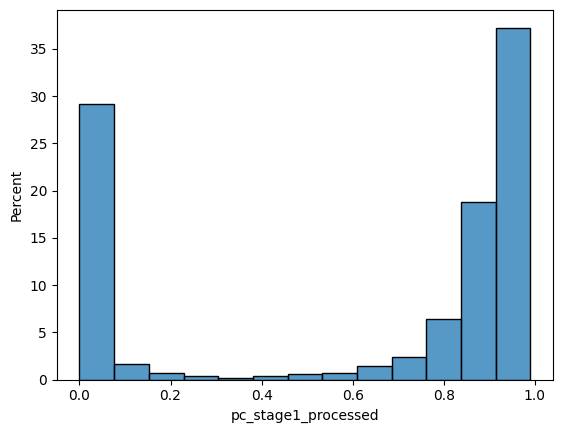

In [36]:
df_summary['pc_stage1_processed'] = df_summary['n_stage1_processed']/df_summary['n_images']
sns.histplot(data=df_summary, x='pc_stage1_processed', stat='percent')

<Axes: xlabel='pc_stage2_processed', ylabel='Percent'>

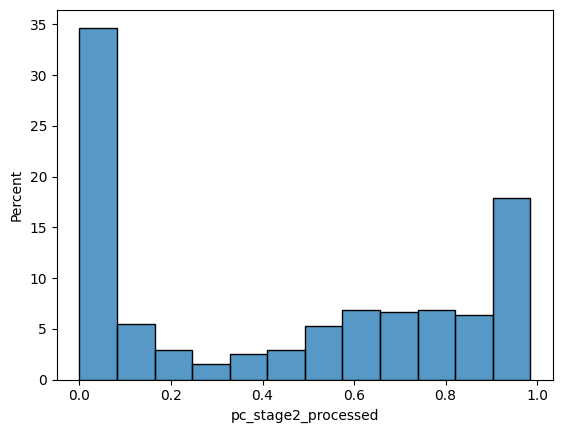

In [37]:
df_summary['pc_stage2_processed'] = df_summary['n_stage2_processed']/df_summary['n_images']
sns.histplot(data=df_summary, x='pc_stage2_processed', stat='percent')

<Axes: xlabel='pc_postprocess_processed', ylabel='Percent'>

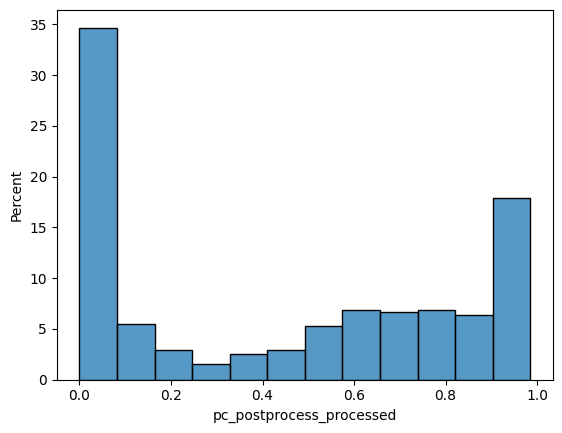

In [38]:
df_summary['pc_postprocess_processed'] = df_summary['n_postprocess_processed']/df_summary['n_images']
sns.histplot(data=df_summary, x='pc_postprocess_processed', stat='percent')

<Axes: xlabel='yield', ylabel='Percent'>

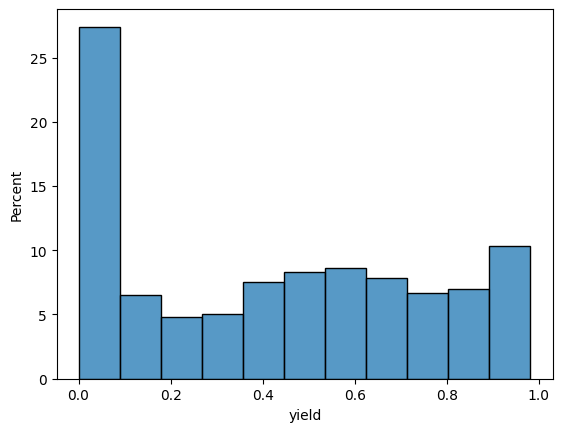

In [39]:
df_summary['yield'] = df_summary['n_master']/df_summary['n_images']
sns.histplot(data=df_summary, x='yield', stat='percent')